In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
training_data=[]
DATADIR='/home/harveer/Desktop/Learner/final_year/Hand-written-text-recognizer-master/training_set'
CATEGORIES=['A','B','C','D','E','F','G','H','I','J','K','L','M','N']
def create_training_data():
    for category in CATEGORIES:
        path=os.path.join(DATADIR,category)
        class_num=CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                ret,thresh=cv2.threshold(img_array,127,255,cv2.THRESH_BINARY)
                training_data.append([thresh,class_num])
            except Exception as e:
                pass
create_training_data()
# Density calculation:
density_all=[]
for i in training_data:
    rows,cols=i[0].shape
    
    density=[]
    r=0
    for j in range(3):
        c=0
        for k in range(3):
            patch=i[0][r:r+10,c:c+10]
            dark=0
            for l in patch:
                for m in l:
                    if(m==255):
                        dark+=1
            density.append(dark/(rows//3*cols//3))
            c+=10
        r+=10
    density_all.append([density,i[1]])
print(density_all[0:3])


[[[0.42, 0.45, 0.01, 0.79, 0.16, 0.28, 0.52, 0.03, 0.43], 0], [[0.2, 0.43, 0.11, 0.6, 0.3, 0.47, 0.44, 0.0, 0.5], 0], [[0.16, 0.29, 0.1, 0.29, 0.1, 0.26, 0.06, 0.0, 0.22], 0]]


In [3]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
DATADIR='/home/harveer/Desktop/Learner/final_year/Hand-written-text-recognizer-master/test_set'
CATEGORIES=['A','B','C','D','E','F','G','H','I','J','K','L','M','N']
density_A=[]
density_B=[]
density_C=[]
density_D=[]
density_E=[]
density_F=[]
density_G=[]
density_H=[]
density_I=[]
density_J=[]
density_K=[]
density_L=[]
density_M=[]
density_N=[]
def create_test_data():
    for category in CATEGORIES:
        path=os.path.join(DATADIR,category)
        class_num=CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                ret,thresh=cv2.threshold(img_array,127,255,cv2.THRESH_BINARY)
                if(category=='A'):
                    density_A.append(thresh)
                elif(category=='B'):
                    density_B.append(thresh)
                elif(category=='C'):
                    density_C.append(thresh)
                elif(category=='D'):
                    density_D.append(thresh)
                elif(category=='E'):
                    density_E.append(thresh)
                elif(category=='F'):
                    density_F.append(thresh)
                elif(category=='G'):
                    density_G.append(thresh)
                elif(category=='H'):
                    density_H.append(thresh)
                elif(category=='I'):
                    density_I.append(thresh)
                elif(category=='J'):
                    density_J.append(thresh)
                elif(category=='K'):
                    density_K.append(thresh)
                elif(category=='L'):
                    density_L.append(thresh)
                elif(category=='M'):
                    density_M.append(thresh)
                elif(category=='N'):
                    density_N.append(thresh)

            except Exception as e:
                pass
create_test_data()
test_data=[density_A,density_B,density_C,density_D,density_E,density_F,density_G,density_H,density_I,density_J,
           density_K,density_L,density_M,density_N]

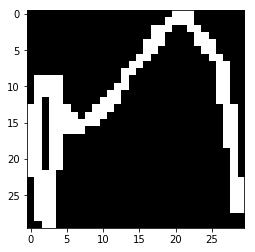

[0.04, 0.18, 0.23, 0.53, 0.1, 0.19, 0.32, 0.0, 0.13]
M


In [9]:
import cv2
from math import sqrt
import matplotlib.pyplot as plt
img=cv2.imread('/home/harveer/Desktop/Learner/final_year/Hand-written-text-recognizer-master/test_set/M/271.jpg',0)
ret,thresh=cv2.threshold(img,127,255,cv2.THRESH_BINARY)
plt.imshow(thresh,cmap="gray")
plt.show()
rows,cols=thresh.shape
density_1=[]
r=0
for j in range(3):
    c=0
    for k in range(3):
        patch=thresh[r:r+10,c:c+10]
        dark=0
        for l in patch:
            for m in l:
                if(m==255):
                    dark+=1
        density_1.append(dark/(rows//3*cols//3))
        c+=10
    r+=10
print(density_1)
count=0
dis=[]
dis2=[]
for i in density_all:
    value=sqrt(sum([abs((a-b)**2) for a,b in zip(i[0],density_1)]))
    dis2.append(value)
    dis.append((value,i[1]))
result=dis[dis2.index(min(dis2))][1]
final_result={0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N'}
print(final_result[result])
    

In [7]:
from math import sqrt
final_output=[]
for test_density in test_data:
    test_result=[]
    for thresh in test_density:
        rows,cols=thresh.shape
        density_1=[]
        r=0
        for j in range(3):
            c=0
            for k in range(3):
                patch=thresh[r:r+10,c:c+10]
                dark=0
                for l in patch:
                    for m in l:
                        if(m==255):
                            dark+=1
                density_1.append(dark/(rows//3*cols//3))
                c+=10
            r+=10
        count=0
        dis=[]
        dis2=[]
        for i in density_all:
            value=sqrt(sum([(a-b)**2 for a,b in zip(i[0],density_1)]))
            dis2.append(value)
            dis.append((value,i[1]))
        result=dis[dis2.index(min(dis2))][1]
        final_result={0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N'}
        test_result.append(final_result[result])
    final_output.append(test_result)   

In [28]:
from collections import OrderedDict
per_list=[]
check=['A','B','C','D','E','F','G','H','I','J','K','L','M','N']
percentage=OrderedDict()
k=0
for i in final_output:
    per=i.count(check[k])
    per_list.append((per/len(i))*100)
    percentage[check[k]]='{}%'.format((per/len(i))*100)
    k+=1
print(percentage)
        

OrderedDict([('A', '80.0%'), ('B', '86.0%'), ('C', '100.0%'), ('D', '96.0%'), ('E', '96.0%'), ('F', '98.0%'), ('G', '96.0%'), ('H', '92.0%'), ('I', '100.0%'), ('J', '100.0%'), ('K', '100.0%'), ('L', '98.0%'), ('M', '100.0%'), ('N', '96.0%')])


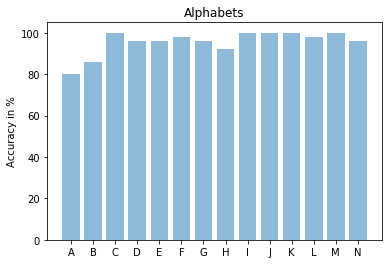

In [30]:
import numpy as np
import matplotlib.pyplot as plt
check=('A','B','C','D','E','F','G','H','I','J','K','L','M','N')
y_pos = np.arange(len(check))
plt.bar(y_pos, per_list, align='center', alpha=0.5)
plt.xticks(y_pos, check)
plt.ylabel('Accuracy in %')
plt.title('Alphabets')
plt.show()